In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('UKM2019.csv')

C:\Users\angel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(3)

,No Kontrak,Cabang,Nama Debitur,Tenor,Status Perkawinan,Kelurahan Debitur,Kecamatan Debitur,Kota,No BPKB,Merk Kendaraan,...,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Jenis Titipan,Kondisi Unit,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak,Max Aging
0,005.0116.0005,CIKUPA,DEDE IMAN SUHERMAN,6,MENIKAH,SANGIANG JAYA,PERIUK,TANGERANG,K-07035021,YAMAHA,...,SMA,LAKI-LAKI,YA,1911000,BPKB MOTOR,Lengkap,MENAMBAH MODAL USAHA,NO,WO,586
1,005.0116.0032,CIKUPA,ASMUNAH,18,MENIKAH,SUKANAGARA,CIKUPA,TANGERANG,I-01416997,YAMAHA,...,SMA,PEREMPUAN,YA,798000,BPKB MOTOR,Lengkap,MENAMBAH MODAL USAHA,NO,WO,666
2,005.0116.0034,CIKUPA,SAPIUN,18,MENIKAH,KARANG TENGAH,PAGEDANGAN,TANGERANG,H 04683409,YAMAHA,...,SD,LAKI-LAKI,YA,424000,BPKB MOTOR,Lengkap,MEMULAI USAHA BARU,NO,WO,389


In [4]:
data.tail(3)

,No Kontrak,Cabang,Nama Debitur,Tenor,Status Perkawinan,Kelurahan Debitur,Kecamatan Debitur,Kota,No BPKB,Merk Kendaraan,...,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Jenis Titipan,Kondisi Unit,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak,Max Aging
21788,124.0619.0070,TAHUNA,NANDA DWI KARTIKA,18,MENIKAH,SANTIAGO,TAHUNA,KEPULAUAN SANGIHE,K05767448,HONDA,...,SMP,PEREMPUAN,YA,254000,BPKB MOTOR,Lengkap,MENAMBAH MODAL USAHA,NO,LIVE,-31
21789,124.0619.0071,TAHUNA,MARGARETH DANDEL,18,MENIKAH,SAWANG BENDAR,TAHUNA,KEPULAUAN SANGIHE,L04424607,YAMAHA,...,S1,PEREMPUAN,YA,681000,BPKB MOTOR,Lengkap,MENAMBAH MODAL USAHA,NO,LIVE,-33
21790,124.0619.0105,TAHUNA,HESTI LOAHE,6,BELUM MENIKAH,SANTIAGO,TAHUNA,KEPULAUAN SANGIHE,L06429330,HONDA,...,SD,PEREMPUAN,YA,782000,BPKB MOTOR,Lengkap,MENAMBAH MODAL USAHA,NO,LIVE,-31


In [5]:
data.drop(['No Kontrak', 'No BPKB', 'Keterangan Merk Kendaraan', 'Warna Kendaraan', 'Tanggal STNK', 'No Mesin', 'No Rangka', 'Plat Nomor', 'Kode Pos',
           'Tanggal STNK', 'No STNK', 'Tahun Kendaraan','Nama Pada BPKB', 'Max Aging', 'Atas Nama BPKB'], axis=1, inplace=True)

In [6]:
data['Lama Tinggal'] = data['Lama Tinggal'].str.extract('(\d+) ,0 Tahun')

In [7]:
data['Lama Usaha'] = data['Lama Usaha'].apply(lambda x: int(x.split(',')[0])*12 + int(x.split(',')[1]))

In [8]:
data.corr()

,Tenor,Nilai OTR,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
Tenor,1.000000,0.066600,0.138293,0.026571,0.037893,0.138591,-0.370259
Nilai OTR,0.066600,1.000000,0.724917,0.087804,-0.025547,0.508641,0.616548
Nilai Funding,0.138293,0.724917,1.000000,0.095006,-0.015109,0.687303,0.826498
Lama Usaha,0.026571,0.087804,0.095006,1.000000,0.012423,0.029897,0.062574
Aging Pastdue,0.037893,-0.025547,-0.015109,0.012423,1.000000,0.052826,-0.030504
OSP,0.138591,0.508641,0.687303,0.029897,0.052826,1.000000,0.549975
Bagi Hasil,-0.370259,0.616548,0.826498,0.062574,-0.030504,0.549975,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21791 entries, 0 to 21790
Data columns (total 31 columns):
Cabang                        21791 non-null object
Nama Debitur                  21791 non-null object
Tenor                         21791 non-null int64
Status Perkawinan             21791 non-null object
Kelurahan Debitur             21791 non-null object
Kecamatan Debitur             21791 non-null object
Kota                          21791 non-null object
Merk Kendaraan                21788 non-null object
Status Rumah                  21791 non-null object
Lama Tinggal                  19566 non-null object
Nilai OTR                     21790 non-null float64
Nilai Funding                 21791 non-null int64
Referensi                     21791 non-null object
Jenis Usaha                   21791 non-null object
Nama Kegiatan Usaha           21791 non-null object
Bentuk Usaha                  21791 non-null object
Lama Usaha                    21791 non-null int64
Kelurahan

In [10]:
data.isna().sum()

Cabang                           0
Nama Debitur                     0
Tenor                            0
Status Perkawinan                0
Kelurahan Debitur                0
Kecamatan Debitur                0
Kota                             0
Merk Kendaraan                   3
Status Rumah                     0
Lama Tinggal                  2225
Nilai OTR                        1
Nilai Funding                    0
Referensi                        0
Jenis Usaha                      0
Nama Kegiatan Usaha              0
Bentuk Usaha                     0
Lama Usaha                       0
Kelurahan Tempat Usaha           0
Kecamatan Tempat Usaha           3
Kota.1                           0
Aging Pastdue                    0
OSP                              0
Pendidikan Debitur               3
Jenis Kelamin                    3
Keterangan Bisnis Checking       0
Bagi Hasil                       0
Jenis Titipan                    3
Kondisi Unit                     0
Penggunaan Dana Inve

In [11]:
data = data.dropna()

In [12]:
print('Number of rows in the dataset:', data.shape[0])
print('Number of columns in the dataset:', data.shape[1])

Number of rows in the dataset: 19562
Number of columns in the dataset: 31


In [13]:
data.describe()

,Tenor,Nilai OTR,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
count,19562.000000,1.956200e+04,1.956200e+04,19562.000000,19562.000000,1.956200e+04,1.956200e+04
mean,15.340149,1.112823e+07,6.817005e+06,54.503374,38.174266,4.939739e+06,7.130705e+05
std,3.310559,6.673529e+06,2.743028e+06,67.125246,143.785296,2.901758e+06,2.835518e+05
min,6.000000,0.000000e+00,1.000000e+06,-24.000000,0.000000,-2.000000e+00,2.010000e+05
25%,12.000000,8.150000e+06,5.000000e+06,1.000000,0.000000,2.973880e+06,5.290000e+05
50%,18.000000,1.015000e+07,6.500000e+06,36.000000,0.000000,4.717662e+06,6.600000e+05
75%,18.000000,1.245000e+07,8.000000e+06,72.000000,0.000000,6.575573e+06,8.300000e+05
max,26.000000,1.500000e+08,3.000000e+07,720.000000,1397.000000,3.045685e+07,3.545000e+06


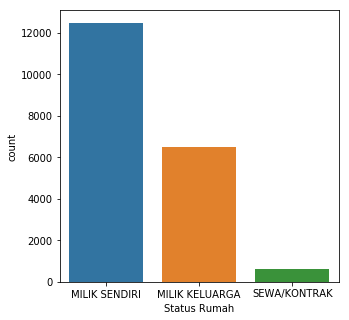

In [14]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Rumah', data=data)
plt.show()

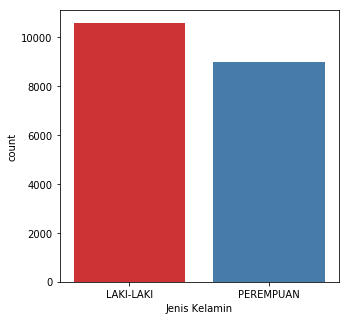

In [15]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Jenis Kelamin', data=data, palette="Set1")
plt.show()

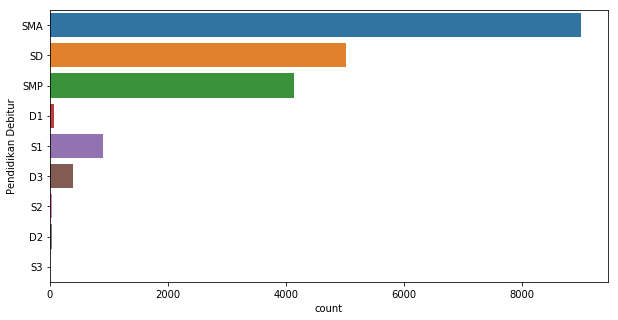

In [16]:
fig = plt.figure(figsize=(10,5))
sns.countplot (y='Pendidikan Debitur', data=data)
plt.show()

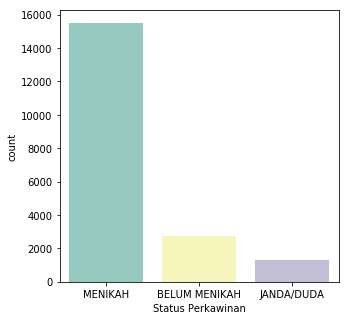

In [17]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Perkawinan', data=data, palette="Set3")
plt.show()

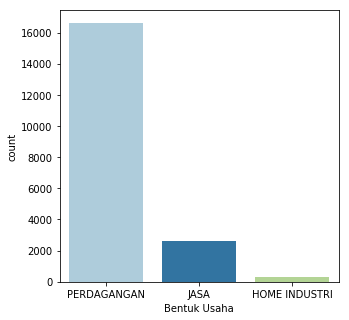

In [18]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Bentuk Usaha', data=data, palette="Paired")
plt.show()

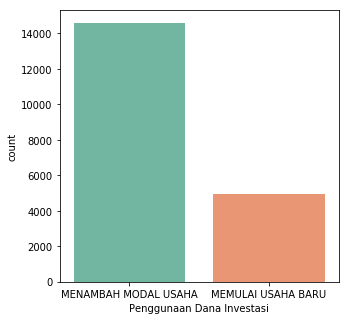

In [19]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Penggunaan Dana Investasi', data=data, palette="Set2")
plt.show()

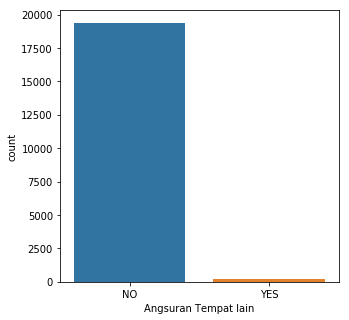

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Angsuran Tempat lain', data=data)
plt.show()

In [21]:
data['Referensi'].value_counts()

MITRA                9486
RO                   4120
AGEN                 3196
DERET CACAH          1522
MEMBER GET MEMBER     950
WALK-IN               140
BROSUR                119
TEMAN/TETANGGA         19
SAUDARA/KELUARGA       10
Name: Referensi, dtype: int64

In [22]:
data_num = data.copy()

In [23]:
data_num.fillna({'Nama Kelompok': 'Unknown', 'Lama Tinggal': 0}, inplace=True)

In [24]:
data_num['Lama Tinggal'] = data_num['Lama Tinggal'].astype(int)

In [25]:
#data_num['Kode Pos'] = data_num['Kode Pos'].replace('-', 0)
#data_num['Kode Pos'] = data_num['Kode Pos'].astype(int)

In [26]:
data_num.loc[:, data_num.dtypes == 'object'] = data_num.loc[:, data_num.dtypes == 'object'].apply(lambda x:LabelEncoder().fit_transform(x), axis=0)

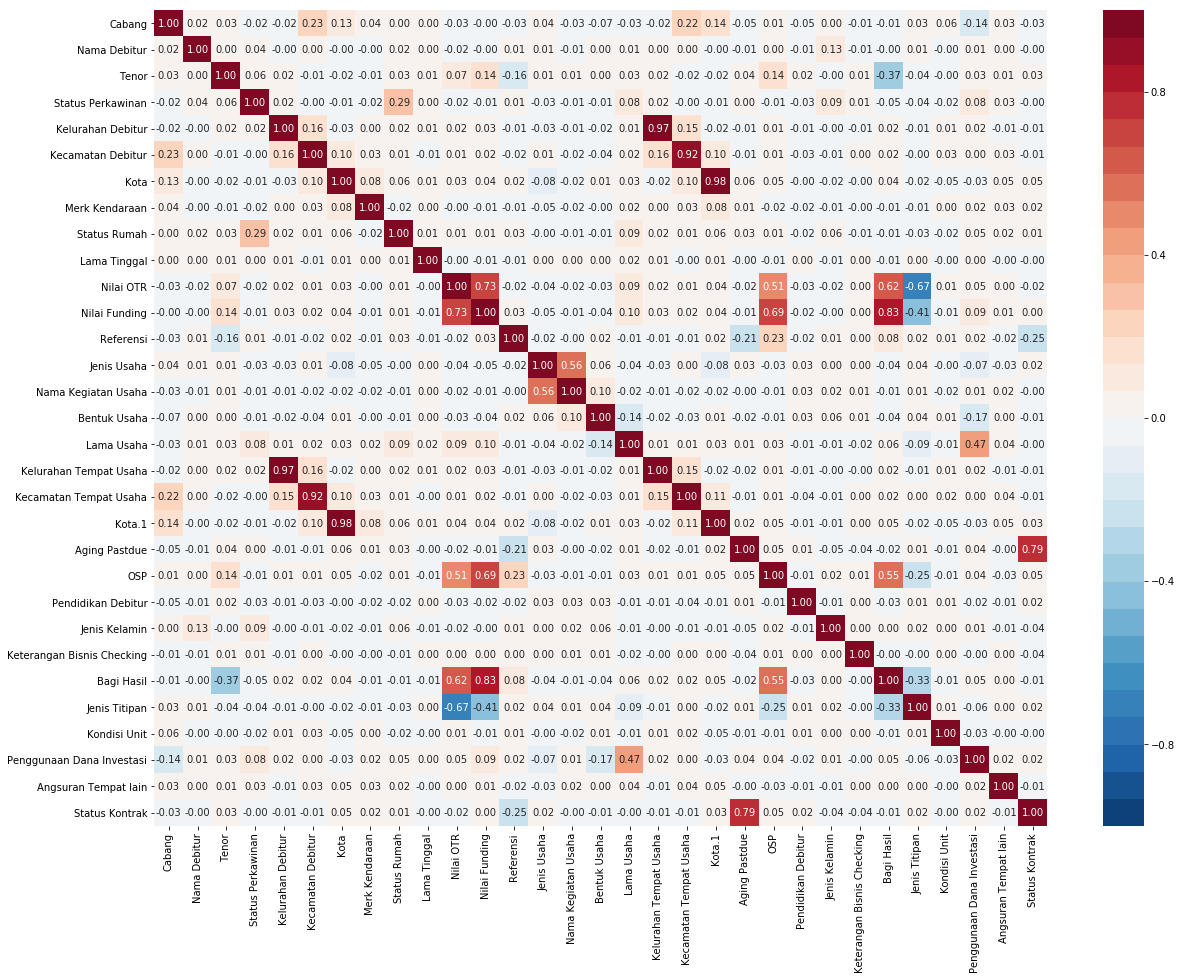

In [27]:
datacorr = data_num.corr()
plt.figure(figsize=(20,15))
sns.heatmap(datacorr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 30), annot=True, fmt='.2f')

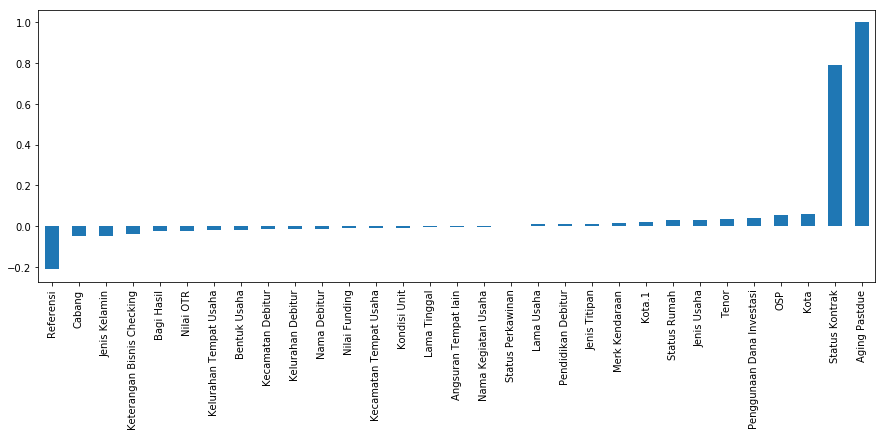

In [28]:
datacorr['Aging Pastdue'].sort_values().plot(kind='bar', figsize=(15,5))

In [29]:
X = data_num.drop(columns='Aging Pastdue')
y = data_num['Aging Pastdue']

#### Random Forest

In [30]:
rf = RandomForestRegressor(n_estimators=30, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
rf_pred = cross_val_predict(rf, X, y, cv=kf)
print('R2:', r2_score(y, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, rf_pred)))

R2: 0.6854138997849196
RMSE: 80.64420042938637


Text(0, 0.5, 'Predicted')

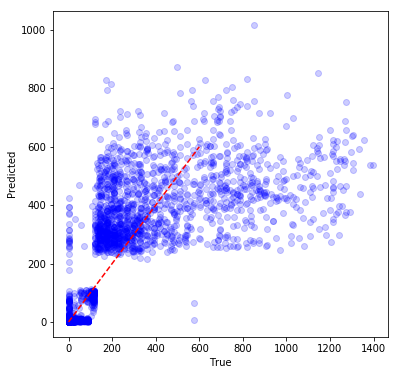

In [31]:
plt.figure(figsize=(6,6))
plt.plot(y, rf_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

#### Gradient Boosting

In [32]:
gb = GradientBoostingRegressor(n_estimators=10, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
gb_pred = cross_val_predict(gb, X, y, cv=kf)
print('R2:', r2_score(y, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, gb_pred)))

R2: 0.5964051638689009
RMSE: 91.34319030476074


Text(0, 0.5, 'Predicted')

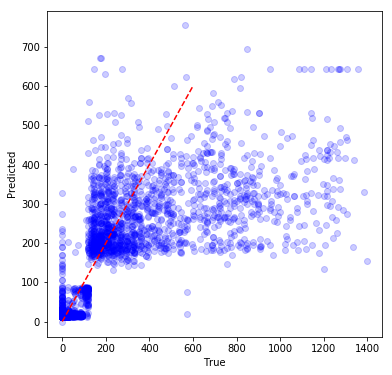

In [33]:
plt.figure(figsize=(6,6))
plt.plot(y, gb_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [34]:
lr = LinearRegression()
kf = KFold(n_splits=5, random_state=123)
lr_pred = cross_val_predict(lr, X, y, cv=kf)
print('R2:', r2_score(y, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, lr_pred)))

R2: 0.576634385622017
RMSE: 93.55374267733973


In [35]:
br = BayesianRidge()
kf = KFold (n_splits=5, random_state=123)
br_pred = cross_val_predict(br, X, y, cv=kf)
print('R2:', r2_score(y, br_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, br_pred)))

R2: 0.576719681958101
RMSE: 93.54431797068781
